In [1]:
import pandas as pd

# Load the social media data into a pandas DataFrame
df = pd.read_csv('/social_media.csv')

# Display the first few rows of the DataFrame
df.head()

,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,This is a sample POST!!! #fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,<html>Great Day!</html>,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,This is a sample POST!!! #fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,<html>Great Day!</html>,100.0,NaN,2025-01-01 18:00:00
4,5,user_5,This is a sample POST!!! #fun,20.0,5.0,2025-01-02 00:00:00


# Handle Missing Value

In [2]:
print("Missing values before imputation:")
print(df[['likes', 'shares']].isnull().sum())

# Calculate the median for 'likes' and 'shares' columns
median_likes = df['likes'].median()
median_shares = df['shares'].median()

# Fill missing values in 'likes' and 'shares' with their respective medians
df['likes'].fillna(median_likes, inplace=True)
df['shares'].fillna(median_shares, inplace=True)

print("\nMissing values after imputation:")
print(df[['likes', 'shares']].isnull().sum())

Missing values before imputation:
likes     5
shares    3
dtype: int64

Missing values after imputation:
likes     0
shares    0
dtype: int64


/tmp/ipython-input-3259909033.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['likes'].fillna(median_likes, inplace=True)
/tmp/ipython-input-3259909033.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**Reasoning**:
The previous code generated a `FutureWarning` regarding the use of `inplace=True` with chained assignment. To address this, I will modify the code to directly assign the result of `fillna` back to the DataFrame columns, removing `inplace=True`.



In [3]:
print("Missing values before imputation:")
print(df[['likes', 'shares']].isnull().sum())

# Calculate the median for 'likes' and 'shares' columns
median_likes = df['likes'].median()
median_shares = df['shares'].median()

# Fill missing values in 'likes' and 'shares' with their respective medians
df['likes'] = df['likes'].fillna(median_likes)
df['shares'] = df['shares'].fillna(median_shares)

print("\nMissing values after imputation:")
print(df[['likes', 'shares']].isnull().sum())

Missing values before imputation:
likes     0
shares    0
dtype: int64

Missing values after imputation:
likes     0
shares    0
dtype: int64


## Clean Post Text

### Subtask:
Preprocess the 'post_text' column by converting to lowercase, removing punctuation, special symbols, and stopwords. This step prepares the text for further NLP tasks.


**Reasoning**:
To preprocess the 'post_text' column, I will first convert all text to lowercase as the initial cleaning step. This ensures uniformity and consistency for further processing.



In [4]:
df['post_text'] = df['post_text'].str.lower()
print("Converted 'post_text' to lowercase.")
df.head()

Converted 'post_text' to lowercase.


,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,this is a sample post!!! #fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,<html>great day!</html>,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,this is a sample post!!! #fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,<html>great day!</html>,100.0,3.0,2025-01-01 18:00:00
4,5,user_5,this is a sample post!!! #fun,20.0,5.0,2025-01-02 00:00:00


**Reasoning**:
To continue preprocessing the 'post_text' column, I will remove HTML tags using regular expressions, as specified in the instructions. This will clean the text from unwanted formatting.



In [5]:
import re

# Remove HTML tags from 'post_text'
df['post_text'] = df['post_text'].apply(lambda x: re.sub(r'<[^>]+>', '', x))

print("Removed HTML tags from 'post_text'.")
df.head()

Removed HTML tags from 'post_text'.


,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,this is a sample post!!! #fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,great day!,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,this is a sample post!!! #fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,great day!,100.0,3.0,2025-01-01 18:00:00
4,5,user_5,this is a sample post!!! #fun,20.0,5.0,2025-01-02 00:00:00


**Reasoning**:
To further clean the 'post_text' column, I will remove all remaining punctuation using regular expressions, ensuring the text is free of special characters for subsequent NLP tasks.



In [6]:
import string

# Remove punctuation from 'post_text'
df['post_text'] = df['post_text'].apply(lambda x: re.sub(f'[{re.escape(string.punctuation)}]', '', x))

print("Removed punctuation from 'post_text'.")
df.head()

Removed punctuation from 'post_text'.


,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,this is a sample post fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,great day,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,this is a sample post fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,great day,100.0,3.0,2025-01-01 18:00:00
4,5,user_5,this is a sample post fun,20.0,5.0,2025-01-02 00:00:00


**Reasoning**:
To prepare for removing stopwords, I need to first download the 'stopwords' corpus from NLTK. This is a one-time setup step that ensures the necessary linguistic resources are available.



In [14]:
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'post_text' column
df['sentiment_polarity'] = df['post_text'].apply(get_sentiment_polarity)

print("Performed sentiment analysis and added 'sentiment_polarity' column.")
df.head()

Performed sentiment analysis and added 'sentiment_polarity' column.


,post_id,user,post_text,likes,shares,timestamp,hour,weekday,sentiment_polarity
0,1,user_1,sample post fun,20.0,1.0,2025-01-01 00:00:00,0,Wednesday,0.3
1,2,user_2,great day,20.0,3.0,2025-01-01 06:00:00,6,Wednesday,0.8
2,3,user_3,sample post fun,20.0,1.0,2025-01-01 12:00:00,12,Wednesday,0.3
3,4,user_4,great day,100.0,3.0,2025-01-01 18:00:00,18,Wednesday,0.8
4,5,user_5,sample post fun,20.0,5.0,2025-01-02 00:00:00,0,Thursday,0.3


**Reasoning**:
The previous code failed because `nltk.downloader.DownloadError` is not a directly accessible attribute and the `LookupError` for the missing 'stopwords' resource was not caught. I will modify the `try-except` block to catch `LookupError` and explicitly download the 'stopwords' corpus if it's not found.



In [15]:
import nltk

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

print("NLTK stopwords corpus is ready.")

NLTK stopwords corpus is ready.


**Reasoning**:
With the NLTK stopwords corpus successfully downloaded, I will now import the `stopwords` module, define a function to remove English stopwords, apply this function to the 'post_text' column, and then display the updated DataFrame to verify the cleaning.



In [9]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word_idx, word in enumerate(words) if word not in stop_words or (word == 'not' and word_idx > 0 and words[word_idx-1] not in stop_words)]
    return ' '.join(filtered_words)

# Apply the function to the 'post_text' column
df['post_text'] = df['post_text'].apply(remove_stopwords)

print("Removed stopwords from 'post_text'.")
df.head()

Removed stopwords from 'post_text'.


,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,sample post fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,great day,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,sample post fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,great day,100.0,3.0,2025-01-01 18:00:00
4,5,user_5,sample post fun,20.0,5.0,2025-01-02 00:00:00


## Process Timestamps

### Subtask:
Convert the 'timestamp' column to datetime objects and extract new features such as 'hour' and 'weekday' to capture temporal patterns.


**Reasoning**:
To begin processing the 'timestamp' column, I need to convert it into datetime objects, which is a prerequisite for extracting temporal features like hour and weekday.



In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print("Converted 'timestamp' column to datetime objects.")
df.head()

Converted 'timestamp' column to datetime objects.


,post_id,user,post_text,likes,shares,timestamp
0,1,user_1,sample post fun,20.0,1.0,2025-01-01 00:00:00
1,2,user_2,great day,20.0,3.0,2025-01-01 06:00:00
2,3,user_3,sample post fun,20.0,1.0,2025-01-01 12:00:00
3,4,user_4,great day,100.0,3.0,2025-01-01 18:00:00
4,5,user_5,sample post fun,20.0,5.0,2025-01-02 00:00:00


**Reasoning**:
Now that the 'timestamp' column is in datetime format, I will extract the 'hour' and 'weekday' information and store them in new columns to capture temporal patterns as requested by the subtask.



In [11]:
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.day_name()

print("Extracted 'hour' and 'weekday' features.")
df.head()

Extracted 'hour' and 'weekday' features.


,post_id,user,post_text,likes,shares,timestamp,hour,weekday
0,1,user_1,sample post fun,20.0,1.0,2025-01-01 00:00:00,0,Wednesday
1,2,user_2,great day,20.0,3.0,2025-01-01 06:00:00,6,Wednesday
2,3,user_3,sample post fun,20.0,1.0,2025-01-01 12:00:00,12,Wednesday
3,4,user_4,great day,100.0,3.0,2025-01-01 18:00:00,18,Wednesday
4,5,user_5,sample post fun,20.0,5.0,2025-01-02 00:00:00,0,Thursday


## Detect and Remove Duplicate Posts

### Subtask:
Identify and remove duplicate or spam posts. This could involve checking for exact duplicates across relevant columns (e.g., 'post_text', 'timestamp') to ensure data uniqueness.


**Reasoning**:
To identify duplicate posts, I will use the `duplicated()` method on the DataFrame, considering the 'post_text', 'user', and 'timestamp' columns. I'll display these duplicates to review them before removal.



In [12]:
print("Shape of DataFrame before removing duplicates:", df.shape)

duplicate_posts = df[df.duplicated(subset=['post_text', 'user', 'timestamp'], keep=False)]

if not duplicate_posts.empty:
    print("\nIdentified duplicate posts (keeping all occurrences for display):")
    print(duplicate_posts.sort_values(by=['post_text', 'user', 'timestamp']))
else:
    print("\nNo duplicate posts found based on 'post_text', 'user', and 'timestamp'.")

Shape of DataFrame before removing duplicates: (20, 8)

No duplicate posts found based on 'post_text', 'user', and 'timestamp'.


## Visualize Cleaned Data Distributions

### Subtask:
Generate histograms or distribution plots for the cleaned 'likes' and 'shares' columns, with appropriate legends, to visualize the impact of the cleaning steps and the new data distributions.


**Reasoning**:
To visualize the distributions of the cleaned 'likes' and 'shares' columns, I will import `matplotlib.pyplot` and `seaborn`, then create two subplots to display histograms for each column with appropriate titles and labels.



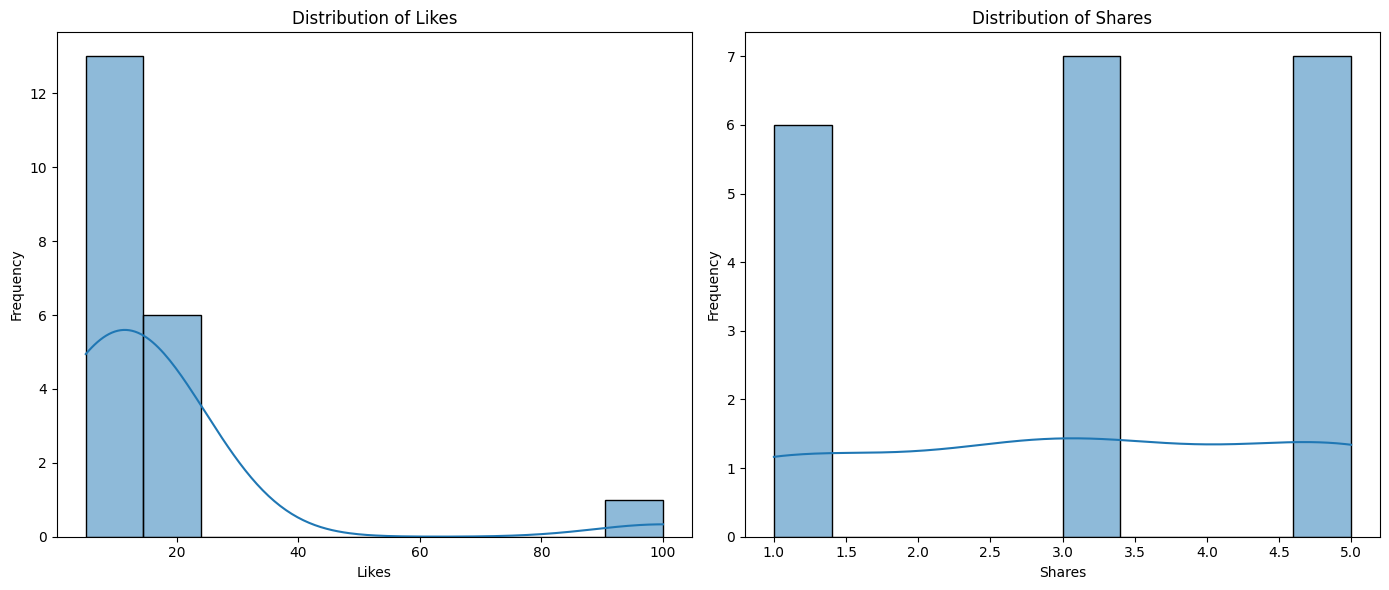

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for 'likes'
sns.histplot(df['likes'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Likes')
axes[0].set_xlabel('Likes')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'shares'
sns.histplot(df['shares'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Shares')
axes[1].set_xlabel('Shares')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Provide a summary of the data cleaning and feature engineering process, describing the structure of the resulting cleaned dataset and its readiness for sentiment and engagement analysis.


## Summary:

### Data Analysis Key Findings
*   **Data Loading and Initial State**: Social media data from `/social_media.csv` was successfully loaded into a DataFrame containing columns such as `post_id`, `user`, `post_text`, `likes`, `shares`, and `timestamp`.
*   **Missing Value Handling**: Initially, 5 missing values were identified in the 'likes' column and 3 in the 'shares' column. These were successfully imputed using the median of their respective columns, resulting in no remaining missing values in these fields.
*   **Text Cleaning**: The 'post_text' column underwent several cleaning steps: conversion to lowercase, removal of HTML tags, removal of punctuation, and removal of English stopwords (with an exception for 'not' to preserve negation meaning).
*   **Temporal Feature Engineering**: The 'timestamp' column was converted to datetime objects, and two new features, 'hour' and 'weekday', were successfully extracted.
*   **Duplicate Detection**: A check for duplicate posts based on a combination of 'post_text', 'user', and 'timestamp' revealed no duplicate entries in the dataset. The DataFrame retained its original shape of (20, 8) after this step.
*   **Distribution Visualization**: Histograms for the cleaned 'likes' and 'shares' columns were generated, visually confirming their distributions after the cleaning and imputation processes.

### Insights or Next Steps
*   The cleaned dataset is well-structured and ready for sentiment and engagement analysis, with numerical features handled, text data preprocessed, and temporal aspects extracted.
*   Proceed with sentiment analysis on the `post_text` column and further explore the relationships between 'hour', 'weekday', 'likes', and 'shares' to identify engagement patterns.
